In [18]:
import pandas as pd

In [19]:
df=pd.read_csv('C:\Manikanta\Projects\Pizza\Pizza_sales.csv')

In [20]:
df.head()

,Unnamed: 0,X,id,date,time,name,size,type,price
0,1,1,2015-000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25
1,2,2,2015-000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.00
2,3,3,2015-000002,2015-01-01,11:57:40,mexicana,M,veggie,16.00
3,4,4,2015-000002,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75
4,5,5,2015-000002,2015-01-01,11:57:40,five_cheese,L,veggie,18.50


In [21]:
df.shape

(49574, 9)

In [22]:
df.columns

Index(['Unnamed: 0', 'X', 'id', 'date', 'time', 'name', 'size', 'type',
       'price'],
      dtype='object')

In [23]:
#trying to create values in new coloumns
df['new']=df['Unnamed: 0']

In [34]:
df.rename(columns={"Unnamed: 0":"Temp"}, inplace=True)

In [41]:
df.drop(columns={"new","Temp"}, inplace=True)

In [42]:
df.set_index('X').head()

,id,date,time,name,size,type,price
X,,,,,,,
1,2015-000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25
2,2015-000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.00
3,2015-000002,2015-01-01,11:57:40,mexicana,M,veggie,16.00
4,2015-000002,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75
5,2015-000002,2015-01-01,11:57:40,five_cheese,L,veggie,18.50


In [44]:
df.describe()

,X,price
count,49574.000000,49574.000000
mean,24787.500000,16.497762
std,14310.925459,3.621954
min,1.000000,9.750000
25%,12394.250000,12.750000
50%,24787.500000,16.500000
75%,37180.750000,20.250000
max,49574.000000,35.950000


In [47]:
df.isnull().sum()

X        0
id       0
date     0
time     0
name     0
size     0
type     0
price    0
dtype: int64

In [50]:
df['name'].drop_duplicates().count()

32

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49574 entries, 0 to 49573
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       49574 non-null  int64  
 1   id      49574 non-null  object 
 2   date    49574 non-null  object 
 3   time    49574 non-null  object 
 4   name    49574 non-null  object 
 5   size    49574 non-null  object 
 6   type    49574 non-null  object 
 7   price   49574 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 3.4+ MB


In [53]:
df.dtypes

X          int64
id        object
date      object
time      object
name      object
size      object
type      object
price    float64
dtype: object

In [68]:
import datetime as dt

In [69]:
df['date'].dtypes

dtype('<M8[ns]')

In [70]:
df['date']=pd.to_datetime(df['date'])

In [71]:
df.dtypes

X                 int64
id               object
date     datetime64[ns]
time             object
name             object
size             object
type             object
price           float64
dtype: object

In [75]:
df['Year']=pd.DatetimeIndex(df['date']).year
df['Month']=pd.DatetimeIndex(df['date']).month

In [76]:
df['Month'].drop_duplicates()

0         1
4232      2
8193      3
12454     4
16605     5
20933     6
25040     7
29432     8
33600     9
37490    10
41373    11
45639    12
Name: Month, dtype: int64

In [84]:
#monthly sales 
df.groupby(['Month','type'])['price'].sum()

Month  type   
1      chicken    16188.75
       classic    18619.40
       supreme    17929.75
       veggie     17055.40
2      chicken    15468.25
       classic    17336.10
       supreme    16718.85
       veggie     15636.40
3      chicken    17625.50
       classic    18116.60
       supreme    17319.65
       veggie     17335.35
4      chicken    16473.00
       classic    18816.80
       supreme    17643.55
       veggie     15803.45
5      chicken    16752.25
       classic    19423.10
       supreme    18315.65
       veggie     16911.75
6      chicken    16086.50
       classic    18035.90
       supreme    18097.25
       veggie     16010.55
7      chicken    17002.25
       classic    19653.00
       supreme    18216.85
       veggie     17685.80
8      chicken    16352.50
       classic    18821.90
       supreme    17093.45
       veggie     16010.40
9      chicken    16039.00
       classic    17832.85
       supreme    15295.60
       veggie     15012.60
10     chicke

In [106]:
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np

In [107]:
#checking Monthly sales
df_monthly_sales=df.groupby('Month')['price'].sum()

In [108]:
df_monthly_sales

Month
1     69793.30
2     65159.60
3     70397.10
4     68736.80
5     71402.75
6     68230.20
7     72557.90
8     68278.25
9     64180.05
10    64027.60
11    70395.35
12    64701.15
Name: price, dtype: float64

<AxesSubplot:xlabel='Month', ylabel='price'>

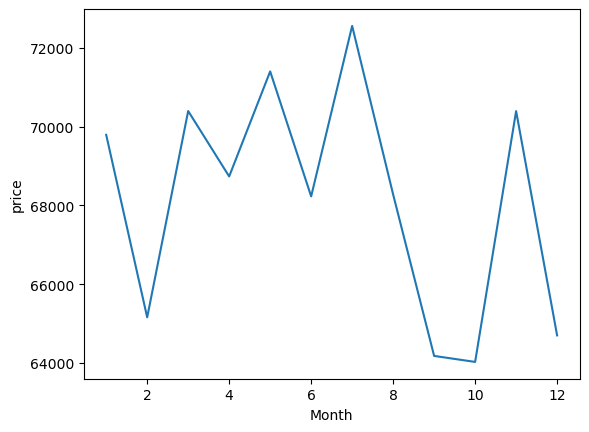

In [118]:
#From the below fig we see there is very less sales in Sep and Oct
sns.lineplot(data=df, x='Month',y='price',ci=None,estimator=np.sum)

<AxesSubplot:xlabel='Month', ylabel='price'>

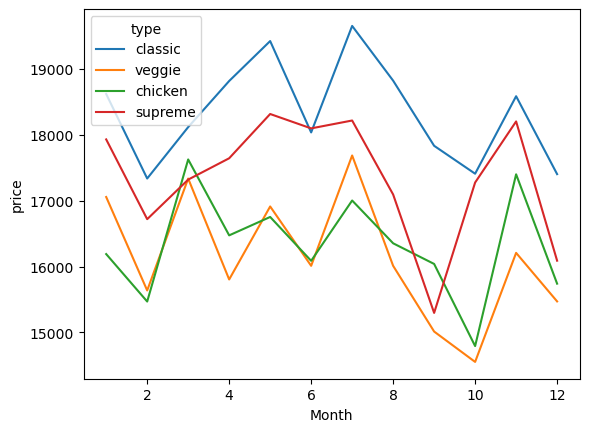

In [121]:
#based on type of analysis we see classisc pizza is doing weel when compared to other Variety
sns.lineplot(data=df, x='Month',y='price',ci=None,estimator=np.sum,hue='type')

In [129]:
df_Varity_Sales=df.groupby(['size','type'],)['price'].count()
df_Varity_Sales

size  type   
L     chicken    4932
      classic    4057
      supreme    4564
      veggie     5403
M     chicken    3894
      classic    4112
      supreme    4046
      veggie     3583
S     chicken    2224
      classic    6139
      supreme    3377
      veggie     2663
XL    classic     552
XXL   classic      28
Name: price, dtype: int64

In [139]:
# we see 21350 Customers have orderd
df['id'].unique().size

21350

In [146]:
df_pivot=pd.pivot_table(df,values=['price'],index=['name','type'],columns=['Month'], aggfunc={ 'price': "sum"})
df_pivot

price                                               \
Month                      1        2        3        4        5        6    
name         type                                                            
bbq_ckn      chicken  3770.25  3416.75  4049.25  3788.50  3953.50  3377.50   
big_meat     classic  1800.00  1812.00  2112.00  1668.00  2280.00  1668.00   
brie_carre   supreme   827.75  1040.60  1087.90   756.80  1087.90   946.00   
calabrese    supreme  1156.75  1461.50  1108.25  1380.75  1393.00  1526.50   
cali_ckn     chicken  3471.50  3537.00  3457.50  3092.00  3561.25  3870.50   
ckn_alfredo  chicken  1456.50  1267.50  1779.00  1259.50  1439.75  1410.25   
ckn_pesto    chicken  1337.75  1433.50  1340.75  1550.75  1379.25  1339.25   
classic_dlx  classic  2941.50  2705.00  3168.00  3342.50  3444.00  3029.00   
five_cheese  veggie   2553.00  2090.50  2312.50  1979.50  2294.00  2294.00   
four_cheese  veggie   2671.65  2734.40  2811.35  2744.70  3052.50  2515.80   
green_garden veggie   1065.50  1226.50  1262.75  1145.75  1258.25  1230.50   
hawaiian     classic  2442.75  2633.00  2878.50  2867.75  2688.00  2563.75   
ital_cpcllo  classic  2153.00  2079.00  2084.50  2260.00  2018.50  2247.50   
ital_supr    supreme  2954.75  2555.25  2665.00  3079.50  3142.25  2958.75   
ital_veggie  veggie   1653.50  1396.50  1397.25  1404.75  1425.25  1184.75   
mediterraneo veggie   1147.50  1083.50  1301.00  1246.00  1500.00  1214.75   
mexicana     veggie   2358.25  1915.50  2388.75  2396.00  1879.75  2230.75   
napolitana   classic  2306.50  1910.50  1774.00  1929.50  1846.50  2291.50   
pep_msh_pep  classic  1435.00  1530.00  1586.00  1548.00  1659.00  1786.00   
pepperoni    classic  3001.25  2554.25  2323.75  2112.75  2998.75  2055.25   
peppr_salami supreme  2342.25  1862.25  2184.50  2362.75  2056.00  2266.50   
prsc_argla   supreme  2218.00  2005.75  2137.25  1789.25  1886.50  1876.75   
sicilian     supreme  2987.75  2560.00  2442.75  2434.75  2433.50  2653.75   
soppressata  supreme  1323.50  1289.25  1335.00  1638.50  1505.00  1526.50   
southw_ckn   chicken  2495.50  2804.25  3155.25  3096.25  2860.25  2584.00   
spicy_ital   supreme  2762.00  2646.25  3205.75  2758.25  3430.75  2985.75   
spin_pesto   veggie   1269.25  1211.00  1513.75   913.25  1551.25  1485.50   
spinach_fet  veggie   2047.25  1695.25  2146.25  1878.25  2231.75  1881.00   
spinach_supr supreme  1357.00  1298.00  1153.25  1443.00  1380.75  1356.75   
thai_ckn     chicken  3657.25  3009.25  3843.75  3686.00  3558.25  3505.00   
the_greek    classic  2539.40  2112.35  2189.85  3088.30  2488.35  2394.90   
veggie_veg   veggie   2289.50  2283.25  2201.75  2095.25  1719.00  1973.50   

                                                                            
Month                      7        8        9        10       11       12  
name         type                                                           
bbq_ckn      chicken  3784.25  3300.25  3380.00  2946.00  3881.75  3120.00  
big_meat     classic  2220.00  1920.00  1704.00  1812.00  2088.00  1884.00  
brie_carre   supreme  1040.60  1016.95  1158.85   804.10   993.30   827.75  
calabrese    supreme  1428.75  1262.25  1104.50  1372.25  1595.50  1144.25  
cali_ckn     chicken  3252.25  3977.25  3088.75  2833.50  3692.75  3575.25  
ckn_alfredo  chicken  1222.75  1402.25  1400.75  1364.00  1625.75  1272.25  
ckn_pesto    chicken  1427.75  1380.75  1483.00  1254.00  1401.50  1373.50  
classic_dlx  classic  3554.50  3187.00  3257.50  3075.50  3379.50  3096.50  
five_cheese  veggie   2571.50  2090.50  2127.50  2090.50  2016.50  1646.50  
four_cheese  veggie   2770.30  2344.65  2481.85  2870.35  2536.95  2731.20  
green_garden veggie   1426.50  1150.00  1254.00  1181.50   836.50   918.00  
hawaiian     classic  2620.25  2678.75  2616.25  2514.75  2952.75  2816.75  
ital_cpcllo  classic  2301.50  2084.50  1981.00  1813.00  1949.50  2122.00  
ital_supr    supreme  2540.50  3002.50  2488.75  2446.50  305

In [164]:

df.columns


Index(['id', 'date', 'time', 'name', 'size', 'type', 'price', 'Year', 'Month'], dtype='object')

In [167]:
# total Sales & #pizzas
df['price'].sum()


817860.05

In [168]:
#No. of pizzas
df['id'].count()

49574

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'hawaiian'),
  Text(1, 0, 'classic_dlx'),
  Text(2, 0, 'mexicana'),
  Text(3, 0, 'thai_ckn'),
  Text(4, 0, 'five_cheese'),
  Text(5, 0, 'ital_supr'),
  Text(6, 0, 'prsc_argla'),
  Text(7, 0, 'bbq_ckn'),
  Text(8, 0, 'the_greek'),
  Text(9, 0, 'spinach_supr'),
  Text(10, 0, 'spin_pesto'),
  Text(11, 0, 'spicy_ital'),
  Text(12, 0, 'ital_cpcllo'),
  Text(13, 0, 'veggie_veg'),
  Text(14, 0, 'green_garden'),
  Text(15, 0, 'southw_ckn'),
  Text(16, 0, 'pepperoni'),
  Text(17, 0, 'cali_ckn'),
  Text(18, 0, 'ckn_pesto'),
  Text(19, 0, 'big_meat'),
  Text(20, 0, 'soppressata'),
  Text(21, 0, 'four_cheese'),
  Text(22, 0, 'napolitana'),
  Text(23, 0, 'mediterraneo'),
  Text(24, 0, 'spinach_fet'),
  Text(25, 0, 'ital_veggie'),
  Text(26, 0, 'calabrese'),
  Text(27, 0, 'peppr_salami'),
  Text(28, 0, 'sicilian'),
  Text(29, 0, 'ckn_alfredo')

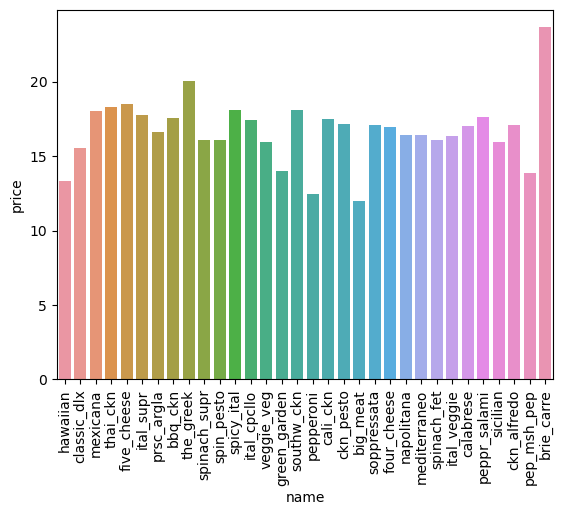

In [188]:
# total Sales by name
sns.barplot(data=df,x='name',y='price', ci=None,label="center")
plt.xticks(rotation=90)

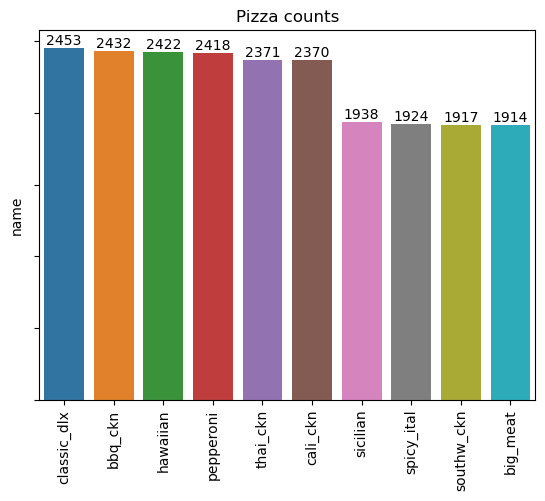

In [192]:
fig, axes = plt.subplots()
count = pd.DataFrame(df["name"].value_counts())
sns.barplot(x=count.index[:10], y=count.iloc[:10, 0], ax=axes)
for container in axes.containers:
    axes.bar_label(container)
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
axes.set_yticklabels(())
axes.set_title("Pizza counts")
plt.show()